# WeatherPy

### Analysis

- It appears that the average maximum temperature is closely correlated with the latitude. The maximum temperature is the highest around the equator area, and gets lower with decreased latitude. However, there is an asymetry of the  maximum temperature in the northern and southern latitudes, e.g., the cities in the northern hemisphere exhibits higher maximum temperature than those in the southern hemisphere at the same latitude, indicating that other factors other than the latitude may play a role as well.

- It appears that the cities in the euator area have highest humidity, the cities at the lower latitudes have varied humidity in a range of 0-100%. Interestingly, most cities in  the northern latitude 0f 60-80 deg. have humidity > 60%.

- It appears that the cloudiness and wind speed in the cities have no apparent correlation with the latitude.

In [102]:
# Dependencies
from citipy import citipy
import csv
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import numpy as np
import time

## Generate City List

In [103]:
# Generate random coordinates list
coordinates=[]

# Set a random seed to ensure the reproductive results
np.random.seed(1)

#Set up a loop to generate random coordinates list
for i in range (1200):
    lat=np.random.randint(-900, 900)/10
    lon=np.random.randint(-1800, 1800)/10
    coors=(lat,lon)
    coordinates.append(coors)
print(coordinates[:20])

[(16.1, -156.5), (19.6, -89.5), (-18.5, 109.5), (6.0, -165.6), (-77.1, 99.7), (-39.2, 166.2), (40.5, -59.8), (40.0, -52.2), (-54.3, 116.2), (-43.2, 115.5), (-64.8, 176.2), (-23.2, 64.6), (-33.8, 82.8), (33.9, 124.9), (-14.7, -27.3), (60.2, 8.8), (21.0, 38.9), (51.7, -76.9), (-58.1, 107.7), (65.8, -46.3)]


In [104]:
# Generate the city list
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    city_obj=citipy.nearest_city(lat, lon)
    if city_obj not in cities:
        cities.append(city_obj)
len(cities)

542

## Generate API Calls

In [105]:
# Save config information.
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

In [106]:
# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q='

In [107]:
#Generate weather data list by API calls
print("Beginning Data Retrieval\n------------------------------------------")
weather_data=[]
counter=0
set=1
for i, city in enumerate (cities):
    data = req.get(query_url + city.city_name).json()
    print("Processing Record "+ str(i+1) + " of Set " + str(set) + "|" + city.city_name )
    print(query_url+ city.city_name)
    weather_data.append(data)
    counter+=1
    if counter==49:
        time.sleep(3)
        set+=1
        counter=0
print("------------------------------------------")
print("Data Retrieval Complete\n------------------------------------------")

Beginning Data Retrieval
------------------------------------------
Processing Record 1 of Set 1|hilo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hilo
Processing Record 2 of Set 1|hopelchen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hopelchen
Processing Record 3 of Set 1|carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=carnarvon
Processing Record 4 of Set 1|makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=makakilo city
Processing Record 5 of Set 1|albany
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=albany
Processing Record 6 of Set 1|hokitika
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hokitika
Processing Record 7 of Set 1|p

Processing Record 55 of Set 2|port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=port elizabeth
Processing Record 56 of Set 2|arica
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=arica
Processing Record 57 of Set 2|beloeil
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=beloeil
Processing Record 58 of Set 2|arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=arraial do cabo
Processing Record 59 of Set 2|takoradi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=takoradi
Processing Record 60 of Set 2|wattegama
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=wattegama
Processing Record 61 of Set 2|leningradskiy
http://api.openweathermap.org/

Processing Record 109 of Set 3|touros
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=touros
Processing Record 110 of Set 3|hami
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hami
Processing Record 111 of Set 3|hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hithadhoo
Processing Record 112 of Set 3|barrow
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=barrow
Processing Record 113 of Set 3|belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=belushya guba
Processing Record 114 of Set 3|ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ostrovnoy
Processing Record 115 of Set 3|mackay
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 163 of Set 4|killybegs
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=killybegs
Processing Record 164 of Set 4|wolomin
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=wolomin
Processing Record 165 of Set 4|gilgit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=gilgit
Processing Record 166 of Set 4|sidi ali
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sidi ali
Processing Record 167 of Set 4|umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=umzimvubu
Processing Record 168 of Set 4|vardo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=vardo
Processing Record 169 of Set 4|saldanha
http://api.openweathermap.org/data/2.5/weather?appid=25b

Processing Record 217 of Set 5|maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=maniitsoq
Processing Record 218 of Set 5|aleksandrovskoye
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=aleksandrovskoye
Processing Record 219 of Set 5|cacequi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=cacequi
Processing Record 220 of Set 5|santa fe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=santa fe
Processing Record 221 of Set 5|yulara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=yulara
Processing Record 222 of Set 5|balkhash
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=balkhash
Processing Record 223 of Set 5|qui nhon
http://api.openweathermap.org/data/2

Processing Record 271 of Set 6|gushikawa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=gushikawa
Processing Record 272 of Set 6|bima
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bima
Processing Record 273 of Set 6|marcona
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=marcona
Processing Record 274 of Set 6|novi knezevac
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=novi knezevac
Processing Record 275 of Set 6|belmonte
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=belmonte
Processing Record 276 of Set 6|turbat
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=turbat
Processing Record 277 of Set 6|cairns
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 325 of Set 7|mitu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mitu
Processing Record 326 of Set 7|saucillo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saucillo
Processing Record 327 of Set 7|grand-santi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=grand-santi
Processing Record 328 of Set 7|lorengau
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lorengau
Processing Record 329 of Set 7|erzurum
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=erzurum
Processing Record 330 of Set 7|sinjai
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sinjai
Processing Record 331 of Set 7|salalah
http://api.openweathermap.org/data/2.5/weather?appid=25bc

Processing Record 380 of Set 8|okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=okhotsk
Processing Record 381 of Set 8|celina
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=celina
Processing Record 382 of Set 8|katangli
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=katangli
Processing Record 383 of Set 8|salamiyah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=salamiyah
Processing Record 384 of Set 8|bulgan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bulgan
Processing Record 385 of Set 8|vitimskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=vitimskiy
Processing Record 386 of Set 8|phun phin
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record 436 of Set 9|baghdad
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=baghdad
Processing Record 437 of Set 9|balimo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=balimo
Processing Record 438 of Set 9|sindi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sindi
Processing Record 439 of Set 9|abha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=abha
Processing Record 440 of Set 9|tapiramuta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tapiramuta
Processing Record 441 of Set 9|aborlan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=aborlan
Processing Record 442 of Set 10|allanridge
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a119

Processing Record 491 of Set 11|nguiu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=nguiu
Processing Record 492 of Set 11|krasnyy chikoy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=krasnyy chikoy
Processing Record 493 of Set 11|mananara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mananara
Processing Record 494 of Set 11|voh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=voh
Processing Record 495 of Set 11|lerwick
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lerwick
Processing Record 496 of Set 11|samusu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=samusu
Processing Record 497 of Set 11|darab
http://api.openweathermap.org/data/2.5/weather?appid=2

In [115]:
#Display an example data
weather_data[0]

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 19.73, 'lon': -155.09},
 'dt': 1505411760,
 'id': 5855927,
 'main': {'humidity': 65,
  'pressure': 1014,
  'temp': 67.44,
  'temp_max': 78.8,
  'temp_min': 59},
 'name': 'Hilo',
 'sys': {'country': 'US',
  'id': 818,
  'message': 0.004,
  'sunrise': 1505405273,
  'sunset': 1505449362,
  'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'few clouds',
   'icon': '02d',
   'id': 801,
   'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 4.7}}

In [116]:
#Generate the data lists
city_name=[]
country_code=[]
date=[]
lat_data=[]
lon_data=[]
clouds_data=[]
humidity_data=[]
temp_data=[]
wind_data=[]
for data in weather_data:
    try:
        country_code.append(data.get("sys").get("country"))
        city_name.append(data.get("name"))
        date.append(data.get("dt")) 
        lat_data.append(data.get("coord").get("lat"))
        lon_data.append(data.get("coord").get("lon")) 
        clouds_data.append(data.get('clouds').get("all")) 
        humidity_data.append(data.get('main').get('humidity')) 
        temp_data.append(data.get('main').get('temp_max')) 
        wind_data.append(data.get('wind').get('speed')) 
    except:
        print("Skipping invalid data")
        continue

#Generate a dataframe to include the data
city_data = {"City": city_name, "Country": country_code,"Date":date, "Lat": lat_data, "Lng": lon_data, "Max Temp":temp_data,
               "Cloudiness": clouds_data, "Humidity": humidity_data, "Wind Speed": wind_data}
city_data = pd.DataFrame(city_data)
city_data.head()

Skipping invalid data


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,20,US,1505411760,65,19.73,-155.09,78.8,4.70
1,Hopelchen,40,MX,1505410920,70,19.77,-89.85,89.6,5.82
2,Carnarvon,0,AU,1505416514,98,-24.87,113.63,65.4,4.16
3,Makakilo City,1,US,1505411880,65,21.35,-158.09,82.4,3.36
4,Albany,75,US,1505415240,73,42.65,-73.76,78.8,8.05


In [117]:
#Display the dataframe info
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 9 columns):
City          541 non-null object
Cloudiness    541 non-null int64
Country       541 non-null object
Date          541 non-null int64
Humidity      541 non-null int64
Lat           541 non-null float64
Lng           541 non-null float64
Max Temp      541 non-null float64
Wind Speed    541 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.1+ KB


## Latitude vs Temperature Plot

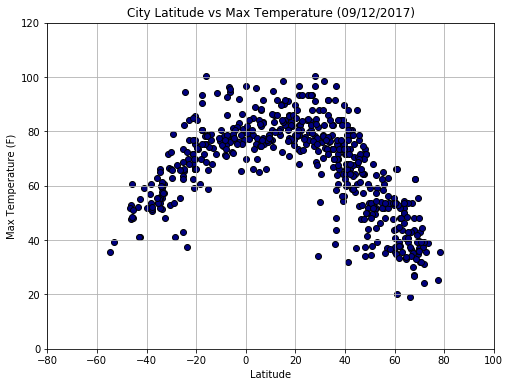

In [118]:
# Build a scatter plot for each data type
plt.figure(figsize=(8,6))
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o", color='navy', edgecolor="black")

# Incorporate the other graph properties
plt.xlim(-80,100)
plt.ylim(0, 120)
plt.title("City Latitude vs Max Temperature" + " (09/12/2017)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTempInWorldCities.png")

# Show plot
plt.show()

## Latitude vs Humidity Plot

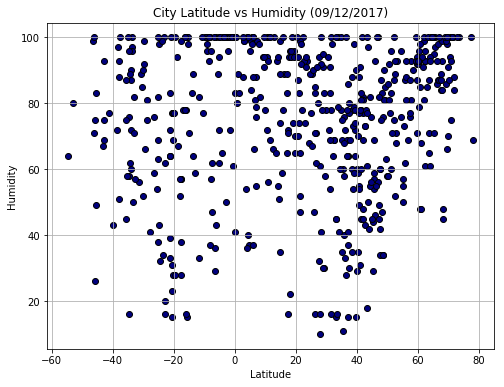

In [119]:
# Build a scatter plot for each data type
plt.figure(figsize=(8,6))
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o",color='navy', edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity" + " (09/12/2017)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs Cloudiness Plot

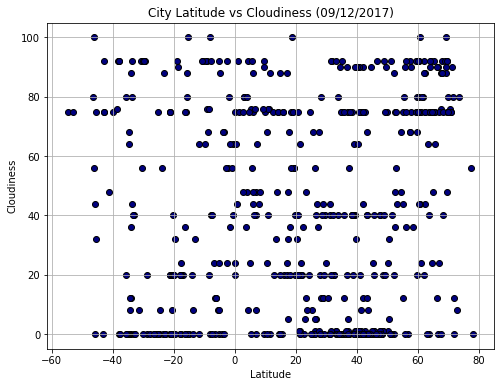

In [120]:
# Build a scatter plot for each data type
plt.figure(figsize=(8,6))
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o", color='navy', edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness" + " (09/12/2017)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs Wind Speed Plot

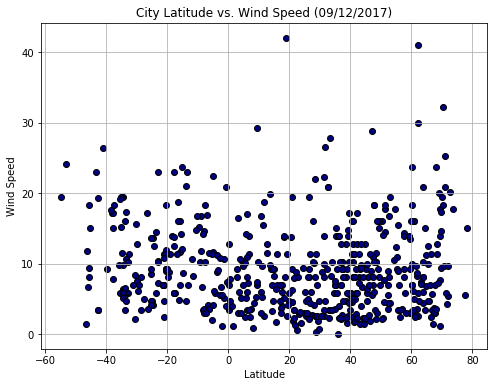

In [121]:
# Build a scatter plot for each data type
plt.figure(figsize=(8,6))
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o", color='navy', edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed" + " (09/12/2017)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [122]:
# Save the dataframe as csv file
city_data.to_csv("city_data.csv")